**Привет! Если ты здесь, то скорее всего ты хочешь сделать тестовое задание в RL-команду лаборатории Тинькофф -- TLab.**

В случае, если ты будешь запускать свой эксперименты в коллабе, то мы подготовили для тебя этот файл с установкой D4RL (задачи для Offline RL) зависимостей. Если же ты будешь запускаться на какой-то другой платформе (non-jupyter-based), то мы советуем воспользоваться докер-образом нашей Offline RL библиотеки [CORL](https://github.com/tinkoff-ai/CORL).

# Install D4RL

In [1]:
#Include this at the top of your colab code
import os
if not os.path.exists('.mujoco_setup_complete'):
  # Get the prereqs
  !apt-get -qq update
  !apt-get -qq install -y libosmesa6-dev libgl1-mesa-glx libglfw3 libgl1-mesa-dev libglew-dev patchelf
  # Get Mujoco
  !mkdir ~/.mujoco
  !wget -q https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz -O mujoco.tar.gz
  !tar -zxf mujoco.tar.gz -C "$HOME/.mujoco"
  !rm mujoco.tar.gz
  # Add it to the actively loaded path and the bashrc path (these only do so much)
  !echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$HOME/.mujoco/mujoco210/bin' >> ~/.bashrc 
  !echo 'export LD_PRELOAD=$LD_PRELOAD:/usr/lib/x86_64-linux-gnu/libGLEW.so' >> ~/.bashrc 
  # THE ANNOYING ONE, FORCE IT INTO LDCONFIG SO WE ACTUALLY GET ACCESS TO IT THIS SESSION
  !echo "/root/.mujoco/mujoco210/bin" > /etc/ld.so.conf.d/mujoco_ld_lib_path.conf
  !ldconfig
  # Install Mujoco-py
  !pip3 install -U 'mujoco-py<2.2,>=2.1'
  # run once
  !touch .mujoco_setup_complete

try:
  if _mujoco_run_once:
    pass
except NameError:
  _mujoco_run_once = False
if not _mujoco_run_once:
  # Add it to the actively loaded path and the bashrc path (these only do so much)
  try:
    os.environ['LD_LIBRARY_PATH']=os.environ['LD_LIBRARY_PATH'] + ':/root/.mujoco/mujoco210/bin'
    os.environ['LD_LIBRARY_PATH']=os.environ['LD_LIBRARY_PATH'] + ':/usr/lib/nvidia'
  except KeyError:
    os.environ['LD_LIBRARY_PATH']='/root/.mujoco/mujoco210/bin'
  try:
    os.environ['LD_PRELOAD']=os.environ['LD_PRELOAD'] + ':/usr/lib/x86_64-linux-gnu/libGLEW.so'
  except KeyError:
    os.environ['LD_PRELOAD']='/usr/lib/x86_64-linux-gnu/libGLEW.so'
  # presetup so we don't see output on first env initialization
  import mujoco_py
  _mujoco_run_once = True

Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../00-libgl1-mesa-glx_21.2.6-0ubuntu0.1~20.04.2_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...
Selecting previously unselected package libgles1:amd64.
Preparing to unpack .../01-libgles1_1.3.2-1~ubuntu0.20.04.2_amd64.deb ...
Unpacking libgles1:amd64 (1.3.2-1~ubuntu0.20.04.2) ...
Selecting previously unselected package libgles-dev:amd64.
Preparing to unpack .../02-libgles-dev_1.3.2-1~ubuntu0.20.04.2_amd64.deb ...
Unpacking libgles-dev:amd64 (1.3.2-1~ubuntu0.20.04.2) ...
Selecting previously unselected package libopengl-dev:amd64.
Preparing to unpack .../03-libopengl-dev_1.3.2-1~ubuntu0.20.04.2_amd64.deb ...
Unpacking libopengl-dev:amd64 (1.3.2-1~ubuntu0.20.04.2) ...
Selecting previously unselected package libglvnd-dev:amd64.
Preparing to unpack .../04-libglvnd-dev_1.3.2-1~ubuntu0.20.04.2_amd64.deb ...


In [2]:
!pip install git+https://github.com/tinkoff-ai/d4rl@master#egg=d4rl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tinkoff-ai/d4rl (to revision master) to /tmp/pip-install-nxq7x_nh/d4rl_0d2d8c7b9a0f4f368feb2866147b36df
  Running command git clone --filter=blob:none --quiet https://github.com/tinkoff-ai/d4rl /tmp/pip-install-nxq7x_nh/d4rl_0d2d8c7b9a0f4f368feb2866147b36df
  Resolved https://github.com/tinkoff-ai/d4rl to commit db6e4b34bb5ce2a51dd3879177c0a0223208a614
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/aravindr93/mjrl (to revision master) to /tmp/pip-install-nxq7x_nh/mjrl_7121a49fdf7c4bb49e84b61c918562ed
  Running command git clone --filter=blob:none --quiet https://github.com/aravindr93/mjrl /tmp/pip-install-nxq7x_nh/mjrl_7121a49fdf7c4bb49e84b61c918562ed
  Resolved https://github.com/aravindr93/mjrl to commit 3871d93763d3b49c4741e6daeaebbc605fe140dc
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.2/6

Давайте проверим, что все работает: датасет для maze2d-umaze-v1 (для примера) должен скачаться и должны отобразиться массив observations.

In [3]:
import gym
import d4rl # Import required to register environments

# Create the environment
env = gym.make('maze2d-umaze-v1')

# d4rl abides by the OpenAI gym interface
env.reset()
env.step(env.action_space.sample())

# Each task is associated with a dataset
# dataset contains observations, actions, rewards, terminals, and infos
dataset = env.get_dataset()
print(dataset['observations']) # An N x dim_observation Numpy array of observations

# Alternatively, use d4rl.qlearning_dataset which
# also adds next_observations.
dataset = d4rl.qlearning_dataset(env)

No module named 'flow'
/usr/local/lib/python3.10/dist-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
No module named 'carla'
/usr/local/lib/python3.10/dist-packages/gym/utils/seeding.py:38: DeprecationWarning: WARN: Function `rng.randn(*size)` is marked as deprecated and will be removed in the future. Please use `rng.standard_normal(size)` instead.
  deprecation(


load datafile: 100%|██████████| 8/8 [00:00<00:00, 22.68it/s]


[[ 1.0856489   1.9745734   0.00981035  0.02174424]
 [ 1.0843927   1.97413    -0.12562364 -0.04433781]
 [ 1.0807577   1.9752754  -0.3634883   0.11453988]
 ...
 [ 1.1328583   2.8062387  -4.484303    0.09555068]
 [ 1.0883482   2.8068895  -4.4510083   0.06509537]
 [ 1.0463258   2.8074222  -4.202244    0.05324839]]


load datafile: 100%|██████████| 8/8 [00:00<00:00, 21.92it/s]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Preliminaries

I would like to give credit to the Tinkoff Lab team as I massively (almost entirely) rely on code of the amazing CORL library, which incredibly helped me to understand the methods and their implementation.

## Methods chosen

I have chosen papers *Offline Reinforcement Learning with Implicit Q-Learning* and *Conservative Q-Learning for Offline Reinforcement Learning* for several reasons.

* First reason is the concept of Q-learning being ubiquitous. But it turns out that it performs poorly when applied to Offline Reinforcement learning problems due to an impact of out-of-distribution actions. Thus, I was excited to learn what modifications are needed so that this method could be implemented in the Offline RL field.

* Secondly, methods both belong to the class referred to as "multi-step", meaning that they can display good performance in tasks that require combining parts of suboptimal policies into the optimal one. I find it important as real-world problems often produce datasets that are corrupted by suboptimal actions. I personally do not compare chosen methods to the "single-step" ones due to the computational limitations, but quantitative results on maze tasks from both IQL and CQL papers prove the aforementioned point.

* Finally, both methods avoid querying the out-of-distribution (OOD) actions, thus making it possible to train models apart from the environment.

As it turned out, IQL method was quite easy to understand and I really did enjoy exploring it. However, CQL was quite complicated, but I managed to make it more clear for myself and implemented it using CORL.

## Datasets chosen

For the sake of comparing methods on different kinds of problems, I use 3 datasets: *halfcheetah-medium-v2*, *halfcheetah-medium-expert-v2*, *antmaze-umaze-v0*.

The first one is bound to test methods on a simple dataset that contains a significant fraction of near-optimal policies.

The second one presents a mixed-distribution dataset, so that the CQL method should perform better on it.

The last one gives an example of a dataset that is heavily corrupted by suboptimal actions. Its purpose is to show the importance of using multi-step methods.

# Experiments

## Preparation

Firstly, I prepare necessary code and constants:

In [5]:
import torch

from iql import *
from cql import *
from eval import *
from data import *
from utils import *
from module import *
from q_func import *
from v_func import *
from policy import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

In [6]:
# General
buffer_size = int(2e6)
discount = 0.99
tau = 0.005
batch_size = 256
eval_freq = int(5e3)
n_episodes = 10
n_iter = 10
alpha = 0.8 # confidence level
max_timesteps = int(1e5)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#IQL
beta = 3.0
iql_tau = 0.7

#CQL
orthogonal_init = True
qf_lr = 3e-4
policy_lr = 3e-5

alpha_multiplier = 1.0
bc_steps = 0
target_update_period = 1

cql_n_actions = 10
cql_target_action_gap = -1.0
cql_temp = 1.0

cql_min_q_weight = 10.0
cql_clip_diff_min: float = -np.inf
cql_clip_diff_max: float = np.inf 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now let's define a function for visualizing the results:

In [7]:
def plot_experiment_results(
    first_results, first_paper_res, first_name, 
    second_results, second_paper_res, second_name
  ):
  plt.figure(figsize=(10, 7))

  plt.plot(np.arange(len(first_results)) * eval_freq, first_results[:, 1], label=f'Average score for {first_name}')
  plt.fill_between(np.arange(len(first_results))* eval_freq, first_results[:, 0], first_results[:, 2], alpha=0.2)
  plt.axhline(first_paper_res, linestyle='--', label=f'Paper result for {first_name}', c='red')

  plt.plot(np.arange(len(second_results))* eval_freq, second_results[:, 1], label=f'Average score for {second_name}')
  plt.fill_between(np.arange(len(second_results))* eval_freq, second_results[:, 0], second_results[:, 2], alpha=0.2)
  plt.axhline(second_paper_res, linestyle='--', label=f'Paper result for {second_name}', c='green')

  plt.title("Comparison of two methods")
  plt.legend()
  plt.show()

## IQL vs CQL in halfcheetah-medium-v2 environment

Firstly, I would like to apply both methods in quite simple environment, where datasets contains a significant fraction of near-optimal trajectories, thus getting rid of the need to combine different policies to get the optimal one.

Hyperparameters are consistent with the ones presented in papers, evaluation is performed on 10 episodes.

### Data preparation:

In [ ]:
env_name = "halfcheetah-medium-v2"

env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]

dataset = d4rl.qlearning_dataset(env)
state_mean, state_std = compute_mean_std(dataset["observations"], eps=1e-3)

dataset["observations"] = normalize_states(
    dataset["observations"], state_mean, state_std
)
dataset["next_observations"] = normalize_states(
    dataset["next_observations"], state_mean, state_std
)
env = wrap_env(env, state_mean=state_mean, state_std=state_std)

replay_buffer = ReplayBuffer(
    state_dim,
    action_dim,
    buffer_size,
    device,
)
replay_buffer.load_d4rl_dataset(dataset)

max_action = float(env.action_space.high[0])
seed = 0
set_seed(seed, env)

/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


load datafile: 100%|██████████| 21/21 [00:05<00:00,  3.75it/s]


Dataset size: 999000


/usr/local/lib/python3.10/dist-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


### IQL initialization:

In [ ]:
q_network = TwinQ(state_dim, action_dim).to(device)
v_network = ValueFunction(state_dim).to(device)
iql_actor = GaussianPolicy(state_dim, action_dim, max_action).to(device)

v_optimizer = torch.optim.Adam(v_network.parameters(), lr=3e-4)
q_optimizer = torch.optim.Adam(q_network.parameters(), lr=3e-4)
iql_actor_optimizer = torch.optim.Adam(iql_actor.parameters(), lr=3e-4)

iql_kwargs = {
  "max_action": max_action,
  "actor": iql_actor,
  "actor_optimizer": iql_actor_optimizer,
  "q_network": q_network,
  "q_optimizer": q_optimizer,
  "v_network": v_network,
  "v_optimizer": v_optimizer,
  "discount": discount,
  "tau": tau,
  "device": device,
  "beta": beta,
  "iql_tau": iql_tau,
  "max_steps": max_timesteps,
}

### CQL initialization:

In [ ]:
critic_1 = FullyConnectedQFunction(state_dim, action_dim, orthogonal_init).to(device)
critic_2 = FullyConnectedQFunction(state_dim, action_dim, orthogonal_init).to(device)
cql_actor = TanhGaussianPolicy(
    state_dim, action_dim, max_action, orthogonal_init=orthogonal_init
).to(device)

critic_1_optimizer = torch.optim.Adam(list(critic_1.parameters()), qf_lr)
critic_2_optimizer = torch.optim.Adam(list(critic_2.parameters()), qf_lr)
cql_actor_optimizer = torch.optim.Adam(cql_actor.parameters(), policy_lr)

cql_kwargs = {
      "critic_1": critic_1,
      "critic_2": critic_2,
      "critic_1_optimizer": critic_1_optimizer,
      "critic_2_optimizer": critic_2_optimizer,
      "actor": cql_actor,
      "actor_optimizer": cql_actor_optimizer,
      "discount": discount,
      "soft_target_update_rate": tau,
      "device": device,
      "target_entropy": -np.prod(env.action_space.shape).item(),
      "alpha_multiplier": alpha_multiplier,
      "use_automatic_entropy_tuning": True,
      "backup_entropy": False,
      "policy_lr": policy_lr,
      "qf_lr": qf_lr,
      "bc_steps": bc_steps,
      "target_update_period": target_update_period,
      "cql_n_actions": cql_n_actions,
      "cql_importance_sample": True,
      "cql_lagrange": False,
      "cql_target_action_gap": cql_target_action_gap,
      "cql_temp": cql_temp,
      "cql_min_q_weight": cql_min_q_weight,
      "cql_max_target_backup": False,
      "cql_clip_diff_min": cql_clip_diff_min,
      "cql_clip_diff_max": cql_clip_diff_max,
  }

### Training:

In [ ]:
print("---------------------------------------")
print(f"Training, Env: {env_name}, Seed: {seed}")
print("---------------------------------------")

iql_trainer = ImplicitQLearning(**iql_kwargs)
cql_trainer = ContinuousCQL(**cql_kwargs)

iql_evaluations = []
cql_evaluations = []

for t in range(int(max_timesteps)):
    batch = replay_buffer.sample(batch_size)
    batch = [b.to(device) for b in batch]
    iql_trainer.train(batch)
    cql_trainer.train(batch)
    # Evaluate episode
    if (t + 1) % eval_freq == 0:
        print(f"Time steps: {t + 1}")
        iql_eval_scores = eval_actor(
            env,
            iql_actor,
            device=device,
            n_episodes=n_episodes,
            seed=seed,
        )
        iql_norm_scores = [env.get_normalized_score(score) * 100.0 for score in iql_eval_scores]
        iql_left = np.quantile(iql_norm_scores, (1 - alpha) / 2)
        iql_right = np.quantile(iql_norm_scores, (1 + alpha) / 2)
        iql_evaluations.append((iql_left, np.mean(iql_norm_scores), iql_right))

        cql_eval_scores = eval_actor(
            env,
            cql_actor,
            device=device,
            n_episodes=n_episodes,
            seed=seed,
        )
        cql_norm_scores = [env.get_normalized_score(score) * 100.0 for score in cql_eval_scores]
        cql_left = np.quantile(cql_norm_scores, (1 - alpha) / 2)
        cql_right = np.quantile(cql_norm_scores, (1 + alpha) / 2)
        cql_evaluations.append((cql_left, np.mean(cql_norm_scores), cql_right))
        print("---------------------------------------")
        print(
            f"Evaluation over {n_episodes} episodes: "
            f"IQL score: {np.mean(iql_norm_scores):.3f}, "
            f"CQL score: {np.mean(cql_norm_scores):.3f}"
        )
        print("---------------------------------------")

---------------------------------------
Training, Env: halfcheetah-medium-v2, Seed: 0
---------------------------------------
Time steps: 5000
---------------------------------------
Evaluation over 10 episodes: IQL score: 19.500, CQL score: 34.075
---------------------------------------
Time steps: 10000
---------------------------------------
Evaluation over 10 episodes: IQL score: 35.239, CQL score: 43.178
---------------------------------------
Time steps: 15000
---------------------------------------
Evaluation over 10 episodes: IQL score: 37.003, CQL score: 44.511
---------------------------------------
Time steps: 20000
---------------------------------------
Evaluation over 10 episodes: IQL score: 43.540, CQL score: 44.401
---------------------------------------
Time steps: 25000
---------------------------------------
Evaluation over 10 episodes: IQL score: 38.162, CQL score: 44.343
---------------------------------------
Time steps: 30000
-------------------------------------

### Visualization

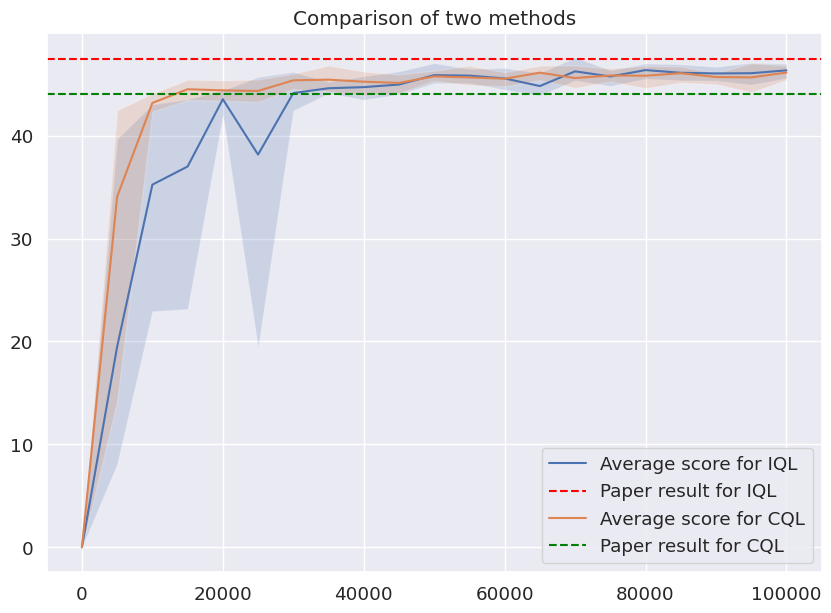

In [ ]:
plot_experiment_results(
  np.array([(0, 0, 0)] + iql_evaluations), 47.4, "IQL",
  np.array([(0, 0, 0)] + cql_evaluations), 44.0, "CQL",
)

Unforunately, the paper result for IQL wan't reached. However, CQL has even beaten the proposed score.

The plot depicts that IQL achieves better results in this case. However, its confidence interval is quite wide at the beggining, and the CQL method seems more stable. So there is a trade-off between performance when trained for less iterations and the final result. And choice of method depends on the specific task.

## IQL vs CQL in halfcheetah-medium-expert-v2 environment

Authors of the CQL paper note that their method performs better when presented a dataset with mixed-distribution actions (such as halfcheetah-medium-expert-v2), which are known to be more common in Offline RL tasks.

Therefore, I would like to compare methods on the dataset, keeping the parameters similar to the previous experiment.

### Data preparation:

In [ ]:
env_name = "halfcheetah-medium-expert-v2"

env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]

dataset = d4rl.qlearning_dataset(env)
state_mean, state_std = compute_mean_std(dataset["observations"], eps=1e-3)

dataset["observations"] = normalize_states(
    dataset["observations"], state_mean, state_std
)
dataset["next_observations"] = normalize_states(
    dataset["next_observations"], state_mean, state_std
)
env = wrap_env(env, state_mean=state_mean, state_std=state_std)

replay_buffer = ReplayBuffer(
    state_dim,
    action_dim,
    buffer_size,
    device,
)
replay_buffer.load_d4rl_dataset(dataset)

max_action = float(env.action_space.high[0])
seed = 0
set_seed(seed, env)

/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


load datafile: 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]


Dataset size: 1998000


/usr/local/lib/python3.10/dist-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


### IQL initialization:

In [ ]:
q_network = TwinQ(state_dim, action_dim).to(device)
v_network = ValueFunction(state_dim).to(device)
iql_actor = GaussianPolicy(state_dim, action_dim, max_action).to(device)

v_optimizer = torch.optim.Adam(v_network.parameters(), lr=3e-4)
q_optimizer = torch.optim.Adam(q_network.parameters(), lr=3e-4)
iql_actor_optimizer = torch.optim.Adam(iql_actor.parameters(), lr=3e-4)

iql_kwargs = {
  "max_action": max_action,
  "actor": iql_actor,
  "actor_optimizer": iql_actor_optimizer,
  "q_network": q_network,
  "q_optimizer": q_optimizer,
  "v_network": v_network,
  "v_optimizer": v_optimizer,
  "discount": discount,
  "tau": tau,
  "device": device,
  "beta": beta,
  "iql_tau": iql_tau,
  "max_steps": max_timesteps,
}

### CQL initialization:

In [ ]:
critic_1 = FullyConnectedQFunction(state_dim, action_dim, orthogonal_init).to(device)
critic_2 = FullyConnectedQFunction(state_dim, action_dim, orthogonal_init).to(device)
cql_actor = TanhGaussianPolicy(
    state_dim, action_dim, max_action, orthogonal_init=orthogonal_init
).to(device)

critic_1_optimizer = torch.optim.Adam(list(critic_1.parameters()), qf_lr)
critic_2_optimizer = torch.optim.Adam(list(critic_2.parameters()), qf_lr)
cql_actor_optimizer = torch.optim.Adam(cql_actor.parameters(), policy_lr)

cql_kwargs = {
      "critic_1": critic_1,
      "critic_2": critic_2,
      "critic_1_optimizer": critic_1_optimizer,
      "critic_2_optimizer": critic_2_optimizer,
      "actor": cql_actor,
      "actor_optimizer": cql_actor_optimizer,
      "discount": discount,
      "soft_target_update_rate": tau,
      "device": device,
      "target_entropy": -np.prod(env.action_space.shape).item(),
      "alpha_multiplier": alpha_multiplier,
      "use_automatic_entropy_tuning": True,
      "backup_entropy": False,
      "policy_lr": policy_lr,
      "qf_lr": qf_lr,
      "bc_steps": bc_steps,
      "target_update_period": target_update_period,
      "cql_n_actions": cql_n_actions,
      "cql_importance_sample": True,
      "cql_lagrange": False,
      "cql_target_action_gap": cql_target_action_gap,
      "cql_temp": cql_temp,
      "cql_min_q_weight": cql_min_q_weight,
      "cql_max_target_backup": False,
      "cql_clip_diff_min": cql_clip_diff_min,
      "cql_clip_diff_max": cql_clip_diff_max,
  }

### Training:

In [ ]:
print("---------------------------------------")
print(f"Training, Env: {env_name}, Seed: {seed}")
print("---------------------------------------")

iql_trainer = ImplicitQLearning(**iql_kwargs)
cql_trainer = ContinuousCQL(**cql_kwargs)

iql_evaluations = []
cql_evaluations = []

for t in range(int(max_timesteps)):
    batch = replay_buffer.sample(batch_size)
    batch = [b.to(device) for b in batch]
    iql_trainer.train(batch)
    cql_trainer.train(batch)
    # Evaluate episode
    if (t + 1) % eval_freq == 0:
        print(f"Time steps: {t + 1}")
        iql_eval_scores = eval_actor(
            env,
            iql_actor,
            device=device,
            n_episodes=n_episodes,
            seed=seed,
        )
        iql_norm_scores = [env.get_normalized_score(score) * 100.0 for score in iql_eval_scores]
        iql_left = np.quantile(iql_norm_scores, (1 - alpha) / 2)
        iql_right = np.quantile(iql_norm_scores, (1 + alpha) / 2)
        iql_evaluations.append((iql_left, np.mean(iql_norm_scores), iql_right))

        cql_eval_scores = eval_actor(
            env,
            cql_actor,
            device=device,
            n_episodes=n_episodes,
            seed=seed,
        )
        cql_norm_scores = [env.get_normalized_score(score) * 100.0 for score in cql_eval_scores]
        cql_left = np.quantile(cql_norm_scores, (1 - alpha) / 2)
        cql_right = np.quantile(cql_norm_scores, (1 + alpha) / 2)
        cql_evaluations.append((cql_left, np.mean(cql_norm_scores), cql_right))
        print("---------------------------------------")
        print(
            f"Evaluation over {n_episodes} episodes: "
            f"IQL score: {np.mean(iql_norm_scores):.3f}, "
            f"CQL score: {np.mean(cql_norm_scores):.3f}"
        )
        print("---------------------------------------")

---------------------------------------
Training, Env: halfcheetah-medium-expert-v2, Seed: 0
---------------------------------------
Time steps: 5000
---------------------------------------
Evaluation over 10 episodes: IQL score: 25.691, CQL score: 24.760
---------------------------------------
Time steps: 10000
---------------------------------------
Evaluation over 10 episodes: IQL score: 27.905, CQL score: 38.675
---------------------------------------
Time steps: 15000
---------------------------------------
Evaluation over 10 episodes: IQL score: 38.873, CQL score: 31.187
---------------------------------------
Time steps: 20000
---------------------------------------
Evaluation over 10 episodes: IQL score: 34.536, CQL score: 23.821
---------------------------------------
Time steps: 25000
---------------------------------------
Evaluation over 10 episodes: IQL score: 38.653, CQL score: 23.858
---------------------------------------
Time steps: 30000
------------------------------

### Visualization

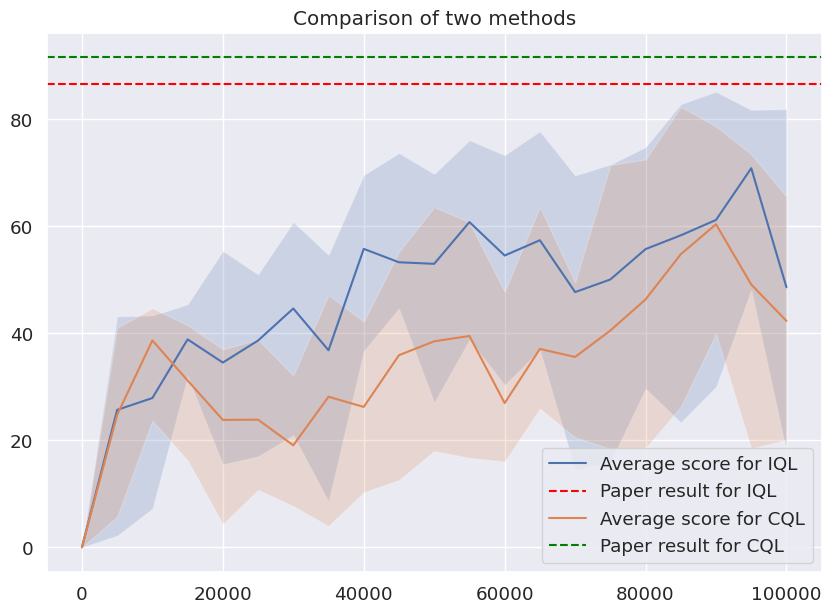

In [ ]:
plot_experiment_results(
  np.array([(0, 0, 0)] + iql_evaluations), 86.7, "IQL",
  np.array([(0, 0, 0)] + cql_evaluations), 91.6, "CQL",
)

Again, the number of iterations is insufficient. Previously computed experiments (that I have lost, unfortunately) were training for $2 \times 10^{6}$ timesteps and showed the tendencies I was expecting: CQL really did perform better, proving the point from paper. I would be glad to repeat those experiments with different setup, as Google Colab has very strict limitations.

Here we can make only some minor conclusions: CQL again showed to be more stable, as its confidence interval is a bit more narrow, than the IQL's one.

## IQL vs CQL in antmaze-umaze-v0 environment

IQL emphasizes combining both advantages from so-called single-step methods and multi-step dynamic programming, which tends to display better performance on datasets corrupted by suboptimal actions (such as maze tasks). Thus, I apply the method on complex antmaze-umaze-v0 problem, using the suggested parameters ($\tau = 0.9$, $\beta = 10$).

CQL has also proven to display satisfactory results when it is necessary to combine optimal actions into an optimal policy. Hence, it is crucial to compare methods on this task and explore their advantages and disadvantages.

### Data preparation:

In [ ]:
env_name = "antmaze-umaze-v0"

env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]

dataset = d4rl.qlearning_dataset(env)
state_mean, state_std = compute_mean_std(dataset["observations"], eps=1e-3)

dataset["observations"] = normalize_states(
    dataset["observations"], state_mean, state_std
)
dataset["next_observations"] = normalize_states(
    dataset["next_observations"], state_mean, state_std
)
env = wrap_env(env, state_mean=state_mean, state_std=state_std)

replay_buffer = ReplayBuffer(
    state_dim,
    action_dim,
    buffer_size,
    device,
)
replay_buffer.load_d4rl_dataset(dataset)

max_action = float(env.action_space.high[0])
seed = 0
set_seed(seed, env)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment antmaze-umaze-v0 is out of date. You should consider upgrading to version `v2` with the environment ID `antmaze-umaze-v2`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/d4rl/locomotion/ant.py:180: UserWarning: This environment is deprecated. Please use the most recent version of this environment.
  offline_env.OfflineEnv.__init__(self, **kwargs)


Target Goal:  (0.6082339487926485, 8.770568220655893)


load datafile: 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]


Dataset size: 998573


### IQL initialization:

In [ ]:
q_network = TwinQ(state_dim, action_dim).to(device)
v_network = ValueFunction(state_dim).to(device)
iql_actor = GaussianPolicy(state_dim, action_dim, max_action).to(device)

v_optimizer = torch.optim.Adam(v_network.parameters(), lr=3e-4)
q_optimizer = torch.optim.Adam(q_network.parameters(), lr=3e-4)
iql_actor_optimizer = torch.optim.Adam(iql_actor.parameters(), lr=3e-4)

iql_kwargs = {
  "max_action": max_action,
  "actor": iql_actor,
  "actor_optimizer": iql_actor_optimizer,
  "q_network": q_network,
  "q_optimizer": q_optimizer,
  "v_network": v_network,
  "v_optimizer": v_optimizer,
  "discount": discount,
  "tau": tau,
  "device": device,
  "beta": 10.0,
  "iql_tau": 0.9,
  "max_steps": max_timesteps,
}

### CQL initialization:

In [ ]:
critic_1 = FullyConnectedQFunction(state_dim, action_dim, orthogonal_init).to(device)
critic_2 = FullyConnectedQFunction(state_dim, action_dim, orthogonal_init).to(device)
cql_actor = TanhGaussianPolicy(
    state_dim, action_dim, max_action, orthogonal_init=orthogonal_init
).to(device)

critic_1_optimizer = torch.optim.Adam(list(critic_1.parameters()), qf_lr)
critic_2_optimizer = torch.optim.Adam(list(critic_2.parameters()), qf_lr)
cql_actor_optimizer = torch.optim.Adam(cql_actor.parameters(), policy_lr)

cql_kwargs = {
      "critic_1": critic_1,
      "critic_2": critic_2,
      "critic_1_optimizer": critic_1_optimizer,
      "critic_2_optimizer": critic_2_optimizer,
      "actor": cql_actor,
      "actor_optimizer": cql_actor_optimizer,
      "discount": discount,
      "soft_target_update_rate": tau,
      "device": device,
      "target_entropy": -np.prod(env.action_space.shape).item(),
      "alpha_multiplier": alpha_multiplier,
      "use_automatic_entropy_tuning": True,
      "backup_entropy": False,
      "policy_lr": policy_lr,
      "qf_lr": qf_lr,
      "bc_steps": bc_steps,
      "target_update_period": target_update_period,
      "cql_n_actions": cql_n_actions,
      "cql_importance_sample": True,
      "cql_lagrange": False,
      "cql_target_action_gap": cql_target_action_gap,
      "cql_temp": cql_temp,
      "cql_min_q_weight": cql_min_q_weight,
      "cql_max_target_backup": False,
      "cql_clip_diff_min": cql_clip_diff_min,
      "cql_clip_diff_max": cql_clip_diff_max,
  }

### Training:

In [ ]:
print("---------------------------------------")
print(f"Training, Env: {env_name}, Seed: {seed}")
print("---------------------------------------")

iql_trainer = ImplicitQLearning(**iql_kwargs)
cql_trainer = ContinuousCQL(**cql_kwargs)

iql_evaluations = []
cql_evaluations = []

for t in range(int(max_timesteps)):
    batch = replay_buffer.sample(batch_size)
    batch = [b.to(device) for b in batch]
    iql_trainer.train(batch)
    cql_trainer.train(batch)
    # Evaluate episode
    if (t + 1) % eval_freq == 0:
        print(f"Time steps: {t + 1}")
        iql_eval_scores = eval_actor(
            env,
            iql_actor,
            device=device,
            n_episodes=n_episodes,
            seed=seed,
        )
        iql_norm_scores = [env.get_normalized_score(score) * 100.0 for score in iql_eval_scores]
        iql_left = np.quantile(iql_norm_scores, (1 - alpha) / 2)
        iql_right = np.quantile(iql_norm_scores, (1 + alpha) / 2)
        iql_evaluations.append((iql_left, np.mean(iql_norm_scores), iql_right))

        cql_eval_scores = eval_actor(
            env,
            cql_actor,
            device=device,
            n_episodes=n_episodes,
            seed=seed,
        )
        cql_norm_scores = [env.get_normalized_score(score) * 100.0 for score in cql_eval_scores]
        cql_left = np.quantile(cql_norm_scores, (1 - alpha) / 2)
        cql_right = np.quantile(cql_norm_scores, (1 + alpha) / 2)
        cql_evaluations.append((cql_left, np.mean(cql_norm_scores), cql_right))
        print("---------------------------------------")
        print(
            f"Evaluation over {n_episodes} episodes: "
            f"IQL score: {np.mean(iql_norm_scores):.3f}, "
            f"CQL score: {np.mean(cql_norm_scores):.3f}"
        )
        print("---------------------------------------")

---------------------------------------
Training, Env: antmaze-umaze-v0, Seed: 0
---------------------------------------
Time steps: 5000


/usr/local/lib/python3.10/dist-packages/gym/utils/seeding.py:38: DeprecationWarning: WARN: Function `rng.randn(*size)` is marked as deprecated and will be removed in the future. Please use `rng.standard_normal(size)` instead.
  deprecation(


---------------------------------------
Evaluation over 10 episodes: IQL score: 50.000, CQL score: 10.000
---------------------------------------
Time steps: 10000
---------------------------------------
Evaluation over 10 episodes: IQL score: 50.000, CQL score: 40.000
---------------------------------------
Time steps: 15000
---------------------------------------
Evaluation over 10 episodes: IQL score: 60.000, CQL score: 30.000
---------------------------------------
Time steps: 20000
---------------------------------------
Evaluation over 10 episodes: IQL score: 60.000, CQL score: 40.000
---------------------------------------
Time steps: 25000
---------------------------------------
Evaluation over 10 episodes: IQL score: 40.000, CQL score: 40.000
---------------------------------------
Time steps: 30000
---------------------------------------
Evaluation over 10 episodes: IQL score: 90.000, CQL score: 50.000
---------------------------------------
Time steps: 35000
----------------

To be consistent with paper results, evaluation on 100 episodes is performed:

In [ ]:
iql_score = eval_actor_final(
  env,
  iql_actor,
  device=device,
  n_episodes=100
)

cql_score = eval_actor_final(
  env,
  cql_actor,
  device=device,
  n_episodes=100
)

In [ ]:
print(f"Score for IQL = {iql_score:.3f}, score for CQL = {cql_score:.3f}")

Score for IQL = 57.333, score for CQL = 41.333


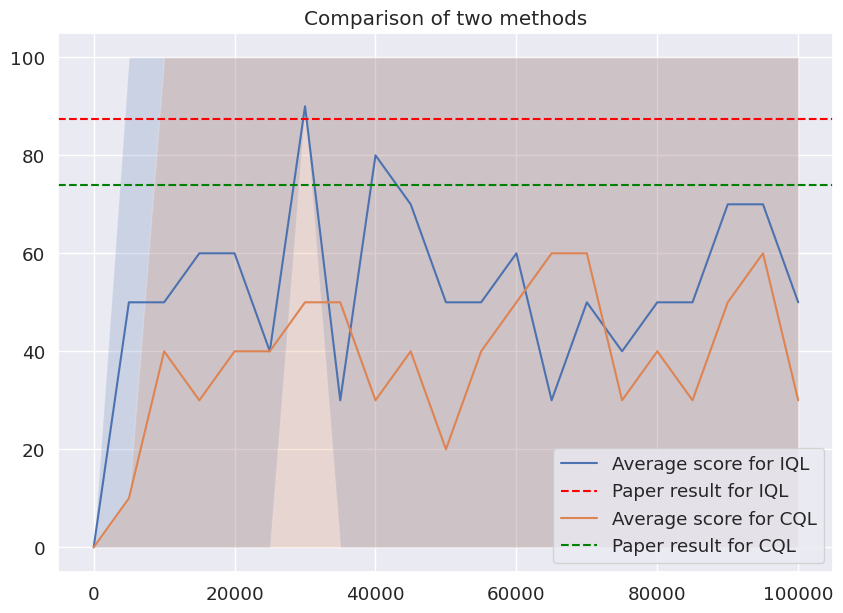

In [ ]:
plot_experiment_results(
  np.array([(0, 0, 0)] + iql_evaluations), 87.5, "IQL",
  np.array([(0, 0, 0)] + cql_evaluations), 74.0, "CQL",
)

Confidence interval is very informative...

Although the results are far from the expected ones, the dynamic is visible: methods really learn the optimal policy from suboptimal ones. Single-step methods, presented in papers, usually produce scores close to 0. Thus, even the produces results can be interpreted as a success.

## IQL with different parameters in antmaze-umaze-v0  environment

IQL paper insists on tuning its hyperparameters being an important aspect of method application. Hence, I am curious to investigate the impact of $\tau$ and $\beta$ (expectile and inverse temperature respectively) on performance when applied to datasets that contain a number of suboptimal actions, thus leading model to capture optimal actions and combine them into final policy. 

### Data preparation:

In [8]:
env_name = "antmaze-umaze-v0"

env = gym.make(env_name)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]

dataset = d4rl.qlearning_dataset(env)
state_mean, state_std = compute_mean_std(dataset["observations"], eps=1e-3)

dataset["observations"] = normalize_states(
    dataset["observations"], state_mean, state_std
)
dataset["next_observations"] = normalize_states(
    dataset["next_observations"], state_mean, state_std
)
env = wrap_env(env, state_mean=state_mean, state_std=state_std)

replay_buffer = ReplayBuffer(
    state_dim,
    action_dim,
    buffer_size,
    device,
)
replay_buffer.load_d4rl_dataset(dataset)

max_action = float(env.action_space.high[0])
seed = 0
set_seed(seed, env)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment antmaze-umaze-v0 is out of date. You should consider upgrading to version `v2` with the environment ID `antmaze-umaze-v2`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/d4rl/locomotion/ant.py:180: UserWarning: This environment is deprecated. Please use the most recent version of this environment.
  offline_env.OfflineEnv.__init__(self, **kwargs)
/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


Target Goal:  (0.9865967920237388, 8.495752332918954)


load datafile: 100%|██████████| 8/8 [00:02<00:00,  3.12it/s]


Dataset size: 998573


/usr/local/lib/python3.10/dist-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(


### First IQL initialization:

In [9]:
q_network_first = TwinQ(state_dim, action_dim).to(device)
v_network_first = ValueFunction(state_dim).to(device)
iql_actor_first = GaussianPolicy(state_dim, action_dim, max_action).to(device)

v_optimizer_first = torch.optim.Adam(v_network_first.parameters(), lr=3e-4)
q_optimizer_first = torch.optim.Adam(q_network_first.parameters(), lr=3e-4)
iql_actor_optimizer_first = torch.optim.Adam(iql_actor_first.parameters(), lr=3e-4)

iql_kwargs_first = {
  "max_action": max_action,
  "actor": iql_actor_first,
  "actor_optimizer": iql_actor_optimizer_first,
  "q_network": q_network_first,
  "q_optimizer": q_optimizer_first,
  "v_network": v_network_first,
  "v_optimizer": v_optimizer_first,
  "discount": discount,
  "tau": tau,
  "device": device,
  "beta": beta,
  "iql_tau": iql_tau,
  "max_steps": max_timesteps,
}

### Second IQL initialization:

In [10]:
q_network_second = TwinQ(state_dim, action_dim).to(device)
v_network_second = ValueFunction(state_dim).to(device)
iql_actor_second = GaussianPolicy(state_dim, action_dim, max_action).to(device)

v_optimizer_second = torch.optim.Adam(v_network_second.parameters(), lr=3e-4)
q_optimizer_second = torch.optim.Adam(q_network_second.parameters(), lr=3e-4)
iql_actor_optimizer_second = torch.optim.Adam(iql_actor_second.parameters(), lr=3e-4)

iql_kwargs_second = {
  "max_action": max_action,
  "actor": iql_actor_second,
  "actor_optimizer": iql_actor_optimizer_second,
  "q_network": q_network_second,
  "q_optimizer": q_optimizer_second,
  "v_network": v_network_second,
  "v_optimizer": v_optimizer_second,
  "discount": discount,
  "tau": tau,
  "device": device,
  "beta": 10.0,
  "iql_tau": 0.9,
  "max_steps": max_timesteps,
}

### Training:

In [11]:
print("---------------------------------------")
print(f"Training, Env: {env_name}, Seed: {seed}")
print("---------------------------------------")

iql_trainer_first = ImplicitQLearning(**iql_kwargs_first)
iql_trainer_second = ImplicitQLearning(**iql_kwargs_second)

iql_evaluations_first = []
iql_evaluations_second = []

for t in range(int(max_timesteps)):
    batch = replay_buffer.sample(batch_size)
    batch = [b.to(device) for b in batch]
    iql_trainer_first.train(batch)
    iql_trainer_second.train(batch)
    # Evaluate episode
    if (t + 1) % eval_freq == 0:
        print(f"Time steps: {t + 1}")
        iql_eval_scores_first = eval_actor(
            env,
            iql_actor_first,
            device=device,
            n_episodes=n_episodes,
            seed=seed,
        )
        iql_norm_scores_first = [env.get_normalized_score(score) * 100.0 for score in iql_eval_scores_first]
        iql_left_first = np.quantile(iql_norm_scores_first, (1 - alpha) / 2)
        iql_right_first = np.quantile(iql_norm_scores_first, (1 + alpha) / 2)
        iql_evaluations_first.append((iql_left_first, np.mean(iql_norm_scores_first), iql_right_first))

        iql_eval_scores_second = eval_actor(
            env,
            iql_actor_second,
            device=device,
            n_episodes=n_episodes,
            seed=seed,
        )
        iql_norm_scores_second = [env.get_normalized_score(score) * 100.0 for score in iql_eval_scores_second]
        iql_left_second = np.quantile(iql_norm_scores_second, (1 - alpha) / 2)
        iql_right_second = np.quantile(iql_norm_scores_second, (1 + alpha) / 2)
        iql_evaluations_second.append((iql_left_second, np.mean(iql_norm_scores_second), iql_right_second))
        print("---------------------------------------")
        print(
            f"Evaluation over {n_episodes} episodes: "
            f"First IQL score: {np.mean(iql_norm_scores_first):.3f}, "
            f"Second IQL score: {np.mean(iql_norm_scores_second):.3f}"
        )
        print("---------------------------------------")

---------------------------------------
Training, Env: antmaze-umaze-v0, Seed: 0
---------------------------------------
Time steps: 5000


/usr/local/lib/python3.10/dist-packages/gym/utils/seeding.py:38: DeprecationWarning: WARN: Function `rng.randn(*size)` is marked as deprecated and will be removed in the future. Please use `rng.standard_normal(size)` instead.
  deprecation(


---------------------------------------
Evaluation over 10 episodes: First IQL score: 50.000, Second IQL score: 70.000
---------------------------------------
Time steps: 10000
---------------------------------------
Evaluation over 10 episodes: First IQL score: 60.000, Second IQL score: 40.000
---------------------------------------
Time steps: 15000
---------------------------------------
Evaluation over 10 episodes: First IQL score: 70.000, Second IQL score: 90.000
---------------------------------------
Time steps: 20000
---------------------------------------
Evaluation over 10 episodes: First IQL score: 60.000, Second IQL score: 60.000
---------------------------------------
Time steps: 25000
---------------------------------------
Evaluation over 10 episodes: First IQL score: 60.000, Second IQL score: 40.000
---------------------------------------
Time steps: 30000
---------------------------------------
Evaluation over 10 episodes: First IQL score: 40.000, Second IQL score: 60.

In [12]:
first_score = eval_actor_final(
  env,
  iql_actor_first,
  device=device,
  n_episodes=100
)

second_score = eval_actor_final(
  env,
  iql_actor_second,
  device=device,
  n_episodes=100
)

In [13]:
print(f"First IQL score = {first_score}, second IQL score = {second_score}")

First IQL score = 55.333333333333336, second IQL score = 64.0


Results prove the assumption made: higher $\tau$ and inverse temperature actually respond to the process of extracting the optimal value of Q-function. 

# Conclusion

I am not completely satisfied with results I got. Some experiments have proven the proposed hypotheses, and some need more time and resources to train. 

However, several conclusions can be made:

* IQL performed better in the studied tasks, but has proven to be quite unstable, meaning that its performance can drop due to some unlucky action. CQL displayed more stability and had quite narrow confidence interval for normalized scores, yet converging to a suboptimal value.

* Experiments have actually proven that multi-step methods have prominent performance in complex tasks (e.g. antmaze) that require constructing an optimal policy from suboptimal parts. Therefore, it is important to use these methods insted of single-step methods.

Despite experiments not being very successful, I enjoyed the process of completing the task a lot. I am grateful for the opportunity to dive into the methods and to use the CORL library, which was a huge help for my research.

I am absolutely thrilled to advance further into the Offline RL and hope to participate in the Tinkoff Lab team's work in this field.
